In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime

from Data import DataCollector
from Metrics import Metrics

In [3]:
tickers = ["AAPL", "MSFT", "NVDA", "AMZN", "GOOG", "TSLA"]

tickers = pd.read_csv("data/stock_etf_tickers.csv")
tickers = list(tickers['Ticker'])

beg = "2020-01-01"
end = "2024-12-31"

data = DataCollector(tickers, beg, end)
px = data.get_prices()
rt = data.get_returns()
rt

[*********************100%***********************]  96 of 96 completed
[*********************100%***********************]  96 of 96 completed


Ticker,AAPL,ABBV,ADBE,AGG,AMZN,ARKG,ARKK,ARKW,AVGO,AXP,...,XLC,XLE,XLF,XLI,XLK,XLU,XLV,XLY,XOM,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.009722,-0.009492,-0.007834,0.002929,-0.012139,-0.020090,-0.007327,-0.004417,-0.025435,-0.009932,...,-0.006450,-0.002971,-0.010618,-0.001927,-0.011243,0.002037,-0.008714,-0.008510,-0.008040,-0.020955
2020-01-06,0.007968,0.007892,0.005726,-0.000797,0.014886,0.012118,0.007780,0.011433,-0.001496,-0.004334,...,0.013356,0.007782,-0.000650,0.000362,0.002383,0.000938,0.006223,0.002782,0.007678,0.045184
2020-01-07,-0.004703,-0.005705,-0.000959,-0.001063,0.002092,0.008284,0.012272,0.013329,-0.003443,-0.005239,...,0.001281,-0.002629,-0.006508,-0.002051,-0.000432,-0.001406,-0.001963,-0.001585,-0.008184,0.022469
2020-01-08,0.016086,0.007087,0.013438,-0.001153,-0.007809,0.014393,0.022487,0.015485,-0.012474,0.017260,...,0.007130,-0.016472,0.006551,0.003385,0.010700,-0.000469,0.006492,0.003016,-0.015081,0.009040
2020-01-09,0.021241,0.007708,0.007636,0.001065,0.004799,0.009755,0.001147,0.004755,-0.008033,0.018082,...,0.005264,0.007369,0.006183,0.004217,0.011336,0.005479,0.004300,0.005302,0.007656,0.000965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.003065,0.016004,-0.000962,-0.003094,0.000622,0.012247,-0.002694,-0.007543,0.055177,0.000502,...,0.005465,0.005872,0.002401,-0.000226,0.010595,0.003404,0.009987,0.003033,0.004062,-0.003855
2024-12-24,0.011478,0.009025,0.002686,0.001138,0.017729,0.008761,0.029034,0.029238,0.031547,0.015596,...,0.009467,0.008459,0.011772,0.007813,0.010333,0.005522,0.004108,0.023127,0.000941,0.004691
2024-12-26,0.003176,-0.004445,0.004956,0.000723,-0.008732,0.019851,0.000000,-0.005473,0.023698,0.001746,...,-0.001311,-0.000827,0.002449,0.000745,0.000665,-0.002354,0.002010,-0.003710,0.000846,-0.002685


In [4]:
shares = data.get_shares()
shares

MSFT      7432377655
AAPL     14776353000
NVDA     24347000000
AMZN     10690216011
GOOG      5407000000
            ...     
XBI       5711242752
VGT     128300171264
SMH         11670900
LQD        293500000
SHY        209300000
Length: 96, dtype: int64

In [63]:
months = rt.resample("MS").last().index
w_process = []

portfolio = []
portfolios = {
    "P1": [],
    "P2": [],
    "P3": [],
    "LongShort": [],
    "P1-P3": [],
    "longs": [],
    # "spread": []
}

for i in range(12, len(months)):
    
    beg = months[i - 12]
    end = months[i - 1]
    
    rt_i = rt[(rt.index >= beg) & (rt.index < end)]
    mom = (1 + rt_i).prod() - 1
    s = mom.rank() - mom.rank().sum() / len(mom)
    w = mom.rank() - mom.rank().sum() / len(mom)

    g = pd.qcut(mom, 3, labels = ['low', 'mid', 'top'])


    idx_top = mom.index[g == "top"]
    idx_mid = mom.index[g == "mid"]
    idx_low = mom.index[g == "low"]
    

    w_spread = pd.Series(0.0, index = mom.index)
    w_spread.loc[idx_top] = + 0.5 / len(idx_top) # equally weigthed
    w_spread.loc[idx_low] = - 0.5 / len(idx_low) # equally weighted

    

    w_cond = w[g == 'top'].sum()
    ct = 1 / w_cond # assumes both groups are equally spread (same length)
    
    w_long = w.copy()

    w_longshort = w.copy()

    w_long[(g == "top")] *= ct
    w_long[g != "top"] = 0

    w_p3_p1 = pd.Series(0.0, index = mom.index)

    w[(g == "top") | (g == "low")] *= ct
    w[(g != "top") & (g != "low")] = 0    
    
    # long-short calculations
    pos_sum = w_longshort[w_longshort > 0].sum()
    neg_sum = w_longshort[w_longshort < 0].sum()
    ct = 1 / pos_sum
    w_longshort = w_longshort * ct

    px_i = px[(px.index >= months[i])].iloc[0]
    mktcap = px_i * shares

    mktcap_p1 = mktcap[idx_top] / mktcap[idx_top].sum()
    mktcap_p2 = mktcap[idx_mid] / mktcap[idx_mid].sum()
    mktcap_p3 = mktcap[idx_low] / mktcap[idx_low].sum()
    
    w_p1 = pd.Series(0.0, index = mom.index)
    w_p2 = pd.Series(0.0, index = mom.index)
    w_p3 = pd.Series(0.0, index = mom.index)
    
    w_p1_p3 = pd.Series(0.0, index = mom.index)
    
    w_p1.loc[idx_top] = mktcap_p1
    w_p2.loc[idx_mid] = mktcap_p2
    w_p3.loc[idx_low] = mktcap_p3

    w_p1_p3.loc[idx_top] = mktcap_p1
    w_p1_p3.loc[idx_low] = -mktcap_p3


    month_plus = months[i] + pd.DateOffset(months = 1)
    ri = rt[(rt.index >= months[i]) & (rt.index < month_plus)]
    ri_cum = ri
    # ri_cum = (1 + ri).cumprod()
    # ri_cum = ri_cum.div(ri_cum.iloc[0], axis=1) # avoid bias

    pi = ri_cum * w    
    pt = pi.sum(axis = 1)
    
    pi_long = ri_cum * w_long
    pi_p1 = ri_cum * w_p1
    pi_p2 = ri_cum * w_p2
    pi_p3 = ri_cum * w_p3
    pi_p1_p3 = ri_cum * w_p1_p3
    pi_longshort = ri_cum * w_longshort

    pt_long = pi_long.sum(axis = 1)
    pt_p1 = pi_p1.sum(axis = 1)
    pt_p2 = pi_p2.sum(axis = 1)
    pt_p3 = pi_p3.sum(axis = 1)
    pt_p1_p3 = pi_p1_p3.sum(axis = 1)
    pt_longshort = pi_longshort.sum(axis = 1)
    
    w_process.append(w_longshort)
    
    if i == 13:
        print("Debug")
        print(w_longshort)

    # if months[i] == pd.Timestamp("2023-09-01"):
        # print(w_p1)
        # print((w_p1 > 0).sum())
        # print(w_p1.sum())
        # print(px_i)
        # print(px_i["ARKK"])
        # print(mktcap[idx_top])
        # mktcap[idx_top].sum()
    
    portfolio.append(pt)

    portfolios['longs'].append(pt_long)
    portfolios['P1'].append(pt_p1)
    portfolios['P2'].append(pt_p2)
    portfolios['P3'].append(pt_p3)
    portfolios['LongShort'].append(pt_longshort)
    portfolios['P1-P3'].append(pt_p1_p3)
    


portfolio = pd.concat(portfolio)

portfolios['longs'] = pd.concat(portfolios['longs'])
portfolios['P1'] = pd.concat(portfolios['P1'])
portfolios['P2'] = pd.concat(portfolios['P2'])
portfolios['P3'] = pd.concat(portfolios['P3'])
portfolios['LongShort'] = pd.concat(portfolios['LongShort'])
portfolios['P1-P3'] = pd.concat(portfolios['P1-P3'])


Debug
Ticker
AAPL    0.032552
ABBV    0.023003
ADBE    0.026476
AGG    -0.023003
AMZN    0.031684
          ...   
XLU    -0.035156
XLV    -0.009115
XLY     0.014323
XOM    -0.040365
ZM      0.039497
Length: 96, dtype: float64


In [ ]:
# w_process = pd.DataFrame(w_process)
# max(w_process.iloc[0]
# plt.figure(figsize=(10,6))
# w_process.plot(ax=plt.gca(), marker='o')
# plt.title("Portfolio Weights Over Time")
# plt.ylabel("Weight")
# plt.xlabel("Date")
# plt.legend(title="Assets")
# plt.grid(True)
# plt.show()

np.False_

In [56]:
df_portfolios = pd.DataFrame(portfolios)
df_portfolios

,P1,P2,P3,LongShort,P1-P3,longs
Date,,,,,,
2021-01-04,-0.014850,-0.013571,-0.000801,0.003897,-0.014049,-0.003721
2021-01-05,0.008425,0.006520,0.004538,-0.004893,0.003887,0.008518
2021-01-06,-0.014077,0.006097,0.005629,-0.030116,-0.019706,-0.011696
2021-01-07,0.029550,0.014852,0.000754,0.023012,0.028796,0.032991
2021-01-08,0.009048,0.005594,0.002686,0.012057,0.006362,0.013898
...,...,...,...,...,...,...
2024-12-23,0.009939,0.006949,0.001279,0.006244,0.008661,0.009755
2024-12-24,0.011199,0.010262,0.005010,0.002355,0.006189,0.012956
2024-12-26,0.001193,0.000019,0.001817,-0.002068,-0.000624,-0.000054


In [57]:
# Debug cell
df_portfolios.describe()


,P1,P2,P3,LongShort,P1-P3,longs
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,0.000578,0.000576,0.000289,0.000307,0.000288,0.000659
std,0.012023,0.010004,0.009141,0.010326,0.009938,0.012073
min,-0.040176,-0.042297,-0.048726,-0.053818,-0.041894,-0.040849
25%,-0.006043,-0.004974,-0.003384,-0.005523,-0.005507,-0.006154
50%,0.000932,0.000688,0.000212,0.000649,0.000741,0.001042
75%,0.008102,0.006360,0.003449,0.006620,0.006132,0.008210
max,0.041254,0.057095,0.070951,0.049000,0.036780,0.053138


[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Portfolios'}, xlabel='Date'>

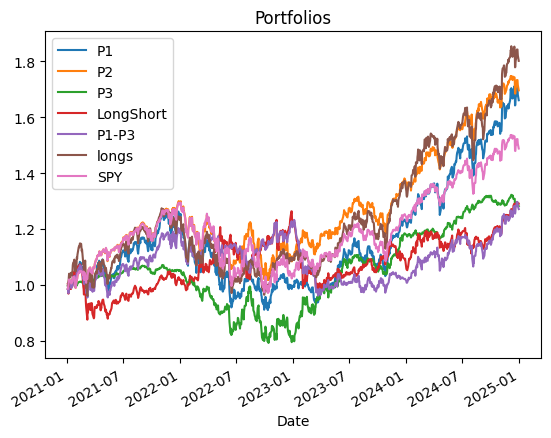

In [58]:
metrics = Metrics(df_portfolios)
metrics.mean()

idx = df_portfolios.index
beg, end = idx[0], idx[-1]

# account for holidays on computing returns
beg = beg - pd.Timedelta(days = 10)
end = end + pd.Timedelta(days = 10)

# adds the marekt to the plot
mkt = DataCollector("SPY", beg, end)
mrt = mkt.get_returns(excess = True)
common = df_portfolios.index.intersection(mrt.index)
mrt = mrt.loc[common]
metrics.add("SPY", mrt)

nav = metrics.nav()
nav.plot(title="Portfolios")


In [59]:
metrics.report()

HI


,P1,P2,P3,LongShort,P1-P3,longs,SPY
Mean,0.135778,0.141789,0.064358,0.066086,0.062100,0.159209,0.104882
Std,0.190862,0.158804,0.145116,0.163915,0.157760,0.191649,0.164871
Sharpe,0.711394,0.892855,0.443493,0.403170,0.393635,0.830732,0.636147
Alpha,0.000108,0.000156,-0.000022,0.000341,0.000130,0.000198,NaN
Beta,1.043874,0.933523,0.691437,-0.075479,0.352437,1.025809,NaN
t-stat Alpha,0.658133,2.008019,-0.122229,1.049076,0.445083,1.102738,NaN
R2,0.813103,0.939327,0.617112,0.005764,0.135662,0.778766,NaN



Portfolio Report:
Mu: 14239378477907358238494713750291402310931936077996351846505506904244289011712.000
Std: 0.595
Sharpe Ratio: 23917032899493321532964248409334204448306643829836435821160362956102513459200.00

Cumulative returns:  12.646142389678761


Date
2021-01-04    0.000000
2021-01-05   -0.005823
2021-01-06   -0.040809
2021-01-07   -0.015628
2021-01-08   -0.001059
                ...   
2024-11-22    0.054688
2024-11-25    0.047379
2024-11-26    0.060114
2024-11-27    0.052699
2024-11-29    0.056242
Length: 984, dtype: float64

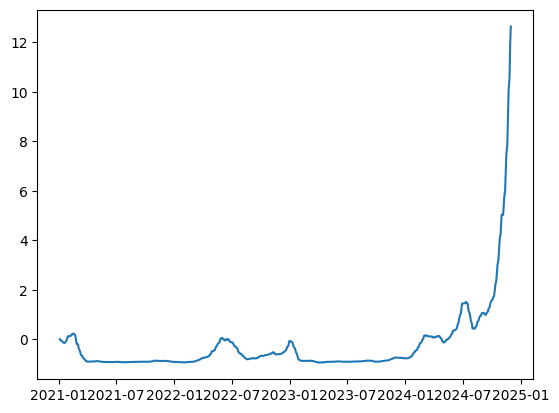

In [136]:
rt_portfolio = (1 + portfolio).cumprod() - 1
rt_portfolio_cum = (1 + portfolio).prod() - 1

metrics = Metrics(portfolios['longs'])
mu = metrics.mean()
st = metrics.std()
sr = metrics.sharpe()

print(metrics.report())

print("Cumulative returns: ", rt_portfolio_cum)
plt.plot(rt_portfolio)
portfolio

In [104]:
# simple example for rebalance weights
returns = pd.DataFrame({
    "AAPL": [0.01, -0.02, 0.03, 0.01, 0.02],
    "MSFT": [0.02,  0.01, -0.01, 0.00, 0.01],
    "GOOG": [-0.01, 0.02, 0.01, 0.01, -0.02]
}, index=pd.date_range("2023-01-01", periods=5))

# --- Step 2: Initial equal weights ---
w0 = np.array([1/3, 1/3, 1/3])

# --- Step 3: Compute cumulative growth factors ---
cum_growth = (1 + returns).cumprod()W

# This represents the value of $1 invested in each asset since t=0
print(cum_growth)

SyntaxError: invalid syntax (2066197433.py, line 12)

In [485]:
y = df_portfolios['P1-P3']
X = df_portfolios['SPY']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
params = model.params
tvals = model.tvalues
r2 = model.rsquared

print(params, tvals, r2)

# model = LinearRegression()
# model.fit(X, y)
# metrics.nav()
# # mkt = DataCollector("SPY", beg, end)
# mkt.get_returns(excess = True)

const    0.000096
SPY      0.345805
dtype: float64 const     0.322453
SPY      12.151800
dtype: float64 0.1307166941992397


In [230]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

idx = portfolios['longs'].index
s, e = idx[0], idx[-1]

# portfolios['longs']
collBen = DataCollector("SPY", s - pd.Timedelta(days = 10), e + pd.Timedelta(days = 10))
ben = collBen.get_returns(True)

# s - pd.Timedelta(days = 1), s
# ben = yf.download("SPY", start = s, end = e + pd.Timedelta(days = 1), auto_adjust=True)['Close']
common = portfolios['longs'].index.intersection(ben.index)
ben = ben.loc[common]
len(ben), len(portfolios['longs'])

# # missing = portfolios['longs'].index.difference(ben.index)
# # missing
X = portfolios['longs'].values
X = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X, ben.values)
print(model.intercept_, model.coef_[0])

X = sm.add_constant(X)
model = sm.OLS(ben.values, X).fit()
model.summary()



[*********************100%***********************]  1 of 1 completed

[-0.06863522] [0.06872405]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     64.14
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           3.27e-15
Time:                        12:14:26   Log-Likelihood:                 3127.4
No. Observations:                 984   AIC:                            -6251.
Df Residuals:                     982   BIC:                            -6241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0686      0.009     -7.947      0.000      -0.086      -0.052
x1             0.0687      0.009      8.009      0.000       0.052       0.086
==============================================================================
Omnibus:                       46.042   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.515
Skew:                           0.084   Prob(JB):                     1.86e-31
Kurtosis:                       4.850   Cond. No.                         53.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ff = pd.read_csv("data/ff_daily.csv")
ff['Date'] = pd.to_datetime(ff['Date'], format = "%Y%m%d")
ff.set_index('Date', inplace = True)
common = portfolios['longs'].index.intersection(ff.index)
ff = ff.loc[common]
ff = ff["Mkt-RF"]
ff

Date
2021-01-04   -1.41
2021-01-05    0.86
2021-01-06    0.79
2021-01-07    1.76
2021-01-08    0.51
              ... 
2024-11-22    0.54
2024-11-25    0.40
2024-11-26    0.42
2024-11-27   -0.39
2024-11-29    0.54
Name: Mkt-RF, Length: 984, dtype: float64

In [287]:

import pandas as pd
import numpy as np

# Example: asset returns
returns = pd.DataFrame({
    'Asset_A': [0.02, -0.01, 0.015],
    'Asset_B': [0.01, 0.005, -0.02],
    'Asset_C': [0.03, -0.015, 0.01]
})

# Portfolio weights (must sum to 1)
weights = np.array([0.4, 0.3, 0.3])

# Compute portfolio returns

portfolio_returns = returns.dot(weights)

print(portfolio_returns)

portfolio_returns2 = (returns * weights).sum(axis=1)

print(portfolio_returns2)




0    0.020
1   -0.007
2    0.003
dtype: float64
0    0.020
1   -0.007
2    0.003
dtype: float64
